In [0]:
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy.sparse import lil_matrix, csr_matrix

HOUSE_TYPE_1 = [
    (69, 111),
    (69, 264),
    (138, 12),
    (138, 165),
    (192, 111),
    (192, 264),
    (261, 12),
    (261, 165),
]
HOUSE_TYPE_2 = [(69, 12), (69, 165), (192, 12), (192, 165)]
HOUSE_TYPE_3 = [(138, 51), (138, 204), (261, 51), (261, 204)]

dX = [1, -1, 0, 0]
dY = [0, 0, 1, -1]

LAMBDA1 = 1.0
LAMBDA2 = 0
k = 0.5

In [0]:

def is_in_house_type_1(x: int, y: int) -> bool:
    for house_x, house_y in HOUSE_TYPE_1:
        yield house_x < x < house_x + 18 and house_y < y < house_y + 18


def is_in_house_type_2(x: int, y: int) -> bool:
    for house_x, house_y in HOUSE_TYPE_2:
        yield (house_x < x < house_x + 18 and house_y < y < house_y + 78) or (
            house_x < x < house_x + 30 and house_y < y < house_y + 18
        )


def is_in_house_type_3(x: int, y: int) -> bool:
    for house_x, house_y in HOUSE_TYPE_3:
        yield (house_x < x < house_x + 18 and house_y < y < house_y + 78) or (
            house_x - 12 < x < house_x + 18 and house_y + 60 < y < house_y + 78
        )


def edge_condition(x: int, y: int) -> bool:
    return (
        any(is_in_house_type_1(x, y))
        or any(is_in_house_type_2(x, y))
        or any(is_in_house_type_3(x, y))
        or x > 299
        or y > 299
        or y == 0
    )

In [0]:
def calculate_matrices(m):
    M = m * m

    tau = 1 / (4 * k * M)
    h = 1 / m
    COEFF_0 = 1 - 4 * (tau * k) / (h ** 2)
    COEFFS = [
        tau * (k / (h ** 2) + x / (2 * h))
        for x in [-LAMBDA1, LAMBDA1, -LAMBDA2, LAMBDA2]
    ]

    A = lil_matrix((M, M), dtype=np.float64)
    b = np.zeros(M)

    for column in range(m):
        for row in range(m):
            j = column * m + row
            if column == 0:
                A[j, j] = 1
                continue
            A[j, j] = COEFF_0
            if edge_condition(column, row):
                continue
            for dx, dy, coeff in zip(dX, dY, COEFFS):
                coord_x = column + dx
                coord_y = row + dy
                if coord_x == 0:
                    b[j] += coeff
                elif edge_condition(coord_x, coord_y):
                    A[j, j] += coeff
                else:
                    A[j, coord_x * m + coord_y] = coeff
    return csr_matrix(A), b


def solve(m=300, eps=1e-5, n_iter=100000):
    M = m * m

    u = np.zeros(M)
    u[0:m] = 1

    A, b = calculate_matrices(m)

    for i in range(n_iter):
        u_new = A @ u + b
        if np.max(np.abs(u_new - u) / np.maximum(1, np.abs(u))) < eps:
            break
        u = u_new
    print(i)
    return u.reshape((m, m))

3914


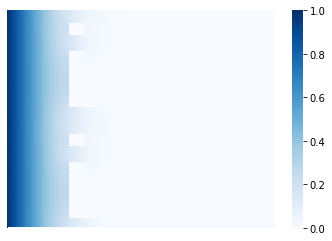

9.608193397521973


In [7]:
eps = 1e-4
start = time.time()
x_res = solve(eps=eps).T[::-1]
seaborn.heatmap(x_res, xticklabels=False, yticklabels=False, cmap="Blues")
plt.show()
print(time.time() - start)

36163


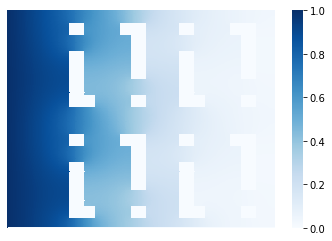

55.29342746734619


In [8]:
eps = 1e-5
start = time.time()
x_res = solve(eps=eps).T[::-1]
seaborn.heatmap(x_res, xticklabels=False, yticklabels=False, cmap="Blues")
plt.show()
print(time.time() - start)

99999


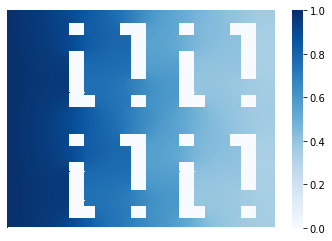

141.380295753479


In [14]:
eps = 1e-6
start = time.time()
x_res = solve(eps=eps).T[::-1]
seaborn.heatmap(x_res, xticklabels=False, yticklabels=False, cmap="Blues")
plt.show()
print(time.time() - start)